# 비지도 학습

## 설정

In [1]:
# data load 등을 위한 chdir
import os
os.chdir("../introduction_to_ml_with_python-master/")

# graph 출력을 위한 기본설정
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고 문구 출력 방지를 위한 설정
import warnings
warnings.filterwarnings(action='ignore')

# basic packages import
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# 그림을 저장할 위치 지정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

## 군집

### 분류 vs 군집

In [5]:
# iris 데이터 셋 로드 및 세팅
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

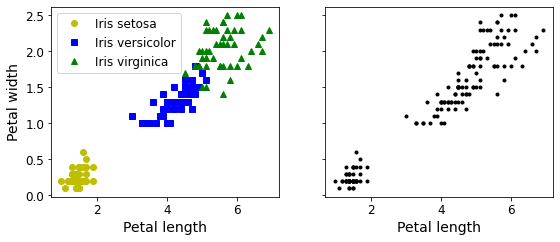

In [6]:
# 레이블의 유무에 따른 시각화
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

In [7]:
# 모든 특성을 학습하는 가우시안 혼합 모델 생성
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping_index = [np.argmax(np.bincount(y_pred[n:n+50])) for n in range(0, 150, 50)]
mapping = {mapping_index[i]:i for i in [0,1,2]}
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

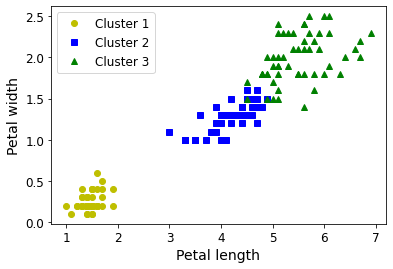

In [8]:
# 가우시안 혼합 모델의 군집 시각화
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [9]:
# 군집화의 결과와 레이블의 일치여부 확인
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## K-평균

In [10]:
# 샘플용 데이터 생성
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                 cluster_std=blob_std, random_state=7)

In [11]:
# 시각화용 함수 정의
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

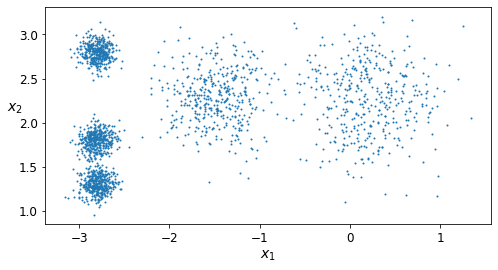

In [12]:
# 데이터 시각화
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 훈련과 예측

In [14]:
# KMeans 모델 학습 및 예측
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k , random_state=42)
y_pred = kmeans.fit_predict(X)

# '''
# KMeans의 가장 어려운 문제는 cluster의 갯수를 지정해야 하는 것임.
# 예제 데이터에 맞게 5개로 할당함.
# '''

In [15]:
# 예측 결과 확인
y_pred

# '''
# 모든 샘플은 0~4의 레이블이 할당됨.
# '''

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [17]:
# kmeans.labels_에도 동일한 결과값이 저장
y_pred is kmeans.labels_

True

In [18]:
# 클러스터의 중심(센트로이드) 확인
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [19]:
# 새로운 샘플에 대한 클러스터링과 레이블 예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [21]:
# 결정경계 시각화 함수 정의
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

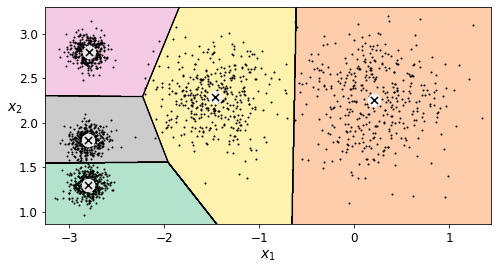

In [22]:
# 결정경계 시각화 (보로노이 다이어그램) 
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### 하드 군집 vs 소프트 군집

In [23]:
# X_new와 각 센트로이드와의 거리 확인
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [24]:
# 위의 결과가 유클리드 거리인지 확인
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

### K-평균 알고리즘

In [25]:
# 센트로이드 업데이트 횟수를 제한하여 저장
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=9)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=9)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=9)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=9)

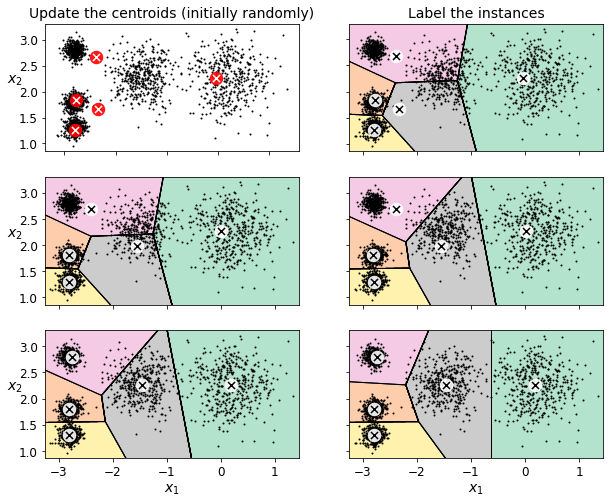

In [26]:
# 반복 횟수에 따른 시각화
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### K-평균의 변동성

In [27]:
# 시각화 함수 정의
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

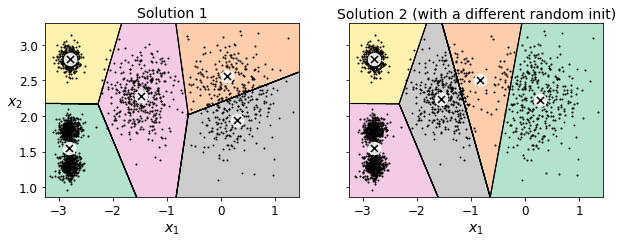

In [28]:
# 랜덤 초기화에 따른 시각화
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### 이너셔

In [29]:
# 모델의 이너셔값 확인
kmeans.inertia_

211.59853725816828

In [30]:
# 이너셔값 계산
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

# '''
# 이너셔는 각 훈련 샘플이 가장 가까운 센트로이드 사이의 제곱거리의 합임.
# '''

211.59853725816856

In [31]:
# score는 음의 이너셔값을 반환
kmeans.score(X)

-211.5985372581683

### 다중 초기화

In [33]:
# 군집화 결과가 나빴던 모델의 이너셔값 확인
print(kmeans_rnd_init1.inertia_)
print(kmeans_rnd_init2.inertia_)

# '''
# 군집화 결과가 좋았던 모델의 이너셔 값이 낮은 것을 확인할 수 있음.
# '''

219.50265127189655
236.63519259650334


In [34]:
# n_init 매개변수에 따라 실행의 횟수가 결정
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

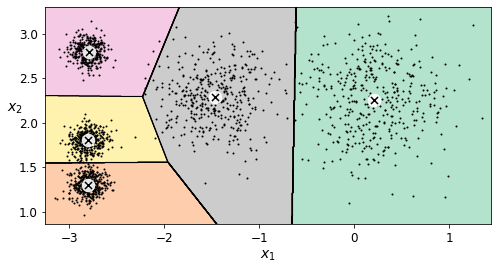

In [35]:
# 최초의 모델과 비교
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

# '''
# K-평균의 n_init의 디폴트 값은 10임.
# n_init이 커질수록 잘못된 모델을 만들 확률이 줄어드나, 시간복잡도가 증가함.
# '''

### K-평균++

In [36]:
# 센트로이드를 먼저 결정하고 학습 가능
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822362

### K-평균 속도 개선

In [37]:
# elkan 방식의 학습 시간 확인
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

129 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [39]:
# full 방식의 학습 시간 확인
%timeit -n 50 KMeans(algorithm="full").fit(X)

93.4 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### 미니배치 K-평균

In [41]:
# 미니배치 K평균 모델 생성 및 확인
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

# '''
# 데이터의 크기가 커서 한번에 학습시킬 수 없는 경우 사용 가능
# '''

211.93186531476786

In [42]:
# memmap을 사용한 미니배치 학습
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

# '''
# 데이터의 크기가 커서 파이썬 인터프리터에 조차 올릴 수 없는 경우 사용 가능
# '''

In [43]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [44]:
# memmap에 데이터 기록
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [45]:
# patialfit으로 학습
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [46]:
# 배치 사이즈에 따라 데이터를 리턴하는 함수 정의
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

# '''
# memmap도 사용이 불가능 할 경우 배치 사이즈를 줄여 훈련할 수 있음.
# '''

In [47]:
# 함수를 활용한 미니배치 학습
np.random.seed(42)
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [48]:
# 결과 확인
best_kmeans.score(X)

-211.70999744411446

In [49]:
# K-평균의 학습속도 확인
%timeit KMeans(n_clusters=5).fit(X)

64 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
# 미니배치 K-평균의 학습속도 확인
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

26.8 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
# 클러스터 갯수에 따른 학습속도 확인
from timeit import timeit
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

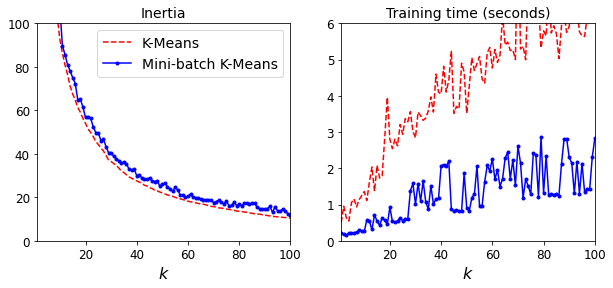

In [52]:
# 두 모델의 이너셔와 학습시간 비교
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
plt.show()

# '''
# 미니배치 K-평균은 클러스터의 갯수가 커짐에 따라 학습속도가 훨씬 빠름.
# 미니배치 K-평균은 클러스터의 갯수가 커져도 K-평균과의 이너셔 값의 차이가 유지됨.
# '''

### 최적의 클러스터 갯수 찾기

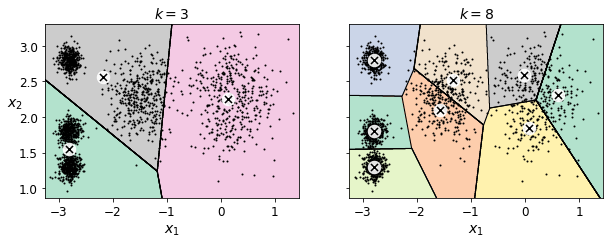

In [53]:
# 클러스터 갯수에 따른 결과 시각화
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [54]:
# 두 모델의 이너셔값 확인
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

# '''
# 클러스터의 갯수가 커짐에 따라 이너셔값은 줄어듦.
# 즉, 이너셔 값이 작다고 해서 최적의 클러스터의 갯수라고 볼 수는 없음.
# '''

653.2223267580945
118.4410862357009


In [55]:
# 클러스터의 갯수와 이너셔값의 변화를 저장
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

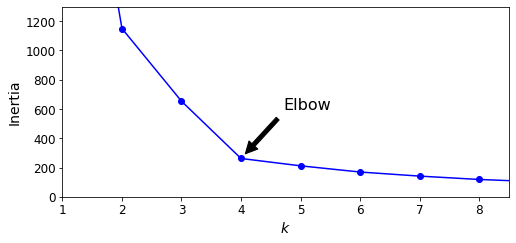

In [56]:
# 클러스터 갯수와 이너셔의 변화 시각화
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# '''
# Elbow값으로 적절한 클러스터의 갯수를 찾을 수는 있으나, 완벽하지는 않음.
# '''

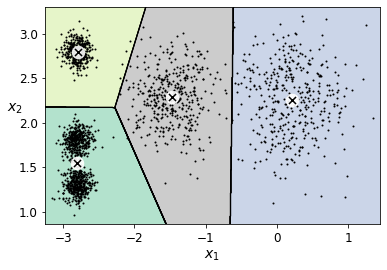

In [57]:
# 4개의 클러스터를 사용한 모델 시각화
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [59]:
# 실루엣 계수 확인
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [60]:
# 클러스터 갯수에 따른 실루엣 계수 저장
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

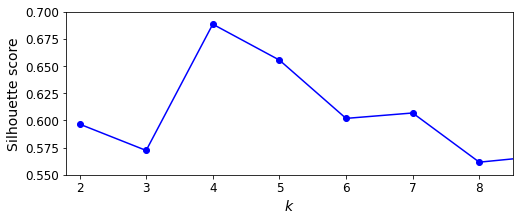

In [61]:
# 클러스터 갯수에 따른 실루엣 계수 시각화
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

# '''
# 실루엣 스코어 역시 완벽하지는 않음. (군집에 완벽한 스코어는 없음. 장단점이 있을 뿐임.)
# 특히 실루엣 스코어는 거리를 기반으로하여, 원형의 데이터가 아닌 경우 활용하기 어려움.
# '''

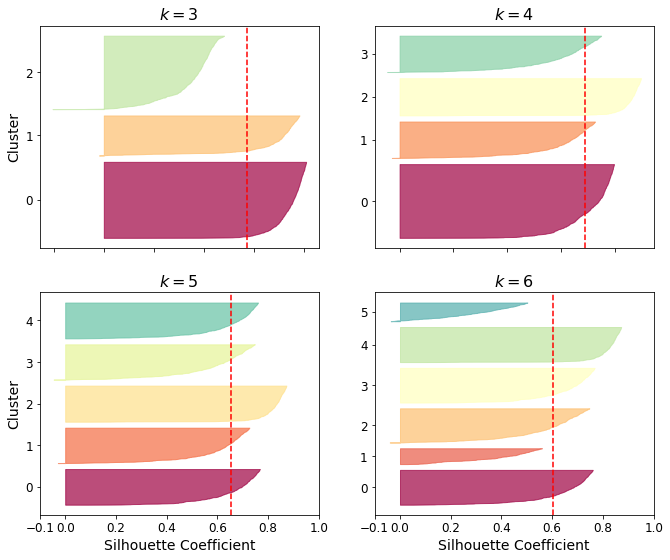

In [62]:
# 실루엣 다이어그램 시각화
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# '''
# 레이블에 속하는 모든 샘플들의 실루엣 스코어를 시각화 한 것임.
# 크기가 균일하고 실루엣 스코어가 균일한 것이 적절하다고 볼 수 있음.
# '''

### K-평균의 한계

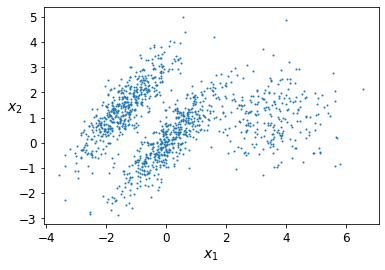

In [64]:
# 샘플 데이터 생성 및 시각화
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

In [65]:
# 센트로이드 지정 여부에 따른 모델 생성
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

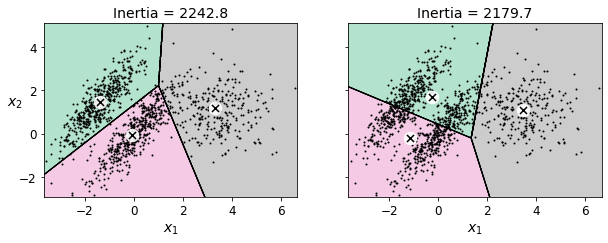

In [66]:
# 센트로이드 지정 여부에 따른 결과 시각화
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

# '''
# K-means는 원형 클러스터를 찾으려는 경향이 있음.
# 원형이 아닌 데이터에 대해서는 잘 작동하지 않음.
# '''

### 군집을 사용한 이미지 분할

In [67]:
# 무당벌레 이미지 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f52d2147a58>)

In [68]:
# 이미지의 차원 확인
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [69]:
# 컬러채널만 유지하고 flat하게 데이터 변환
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [70]:
# 클러스터 갯수에 따른 flat데이터 저장
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

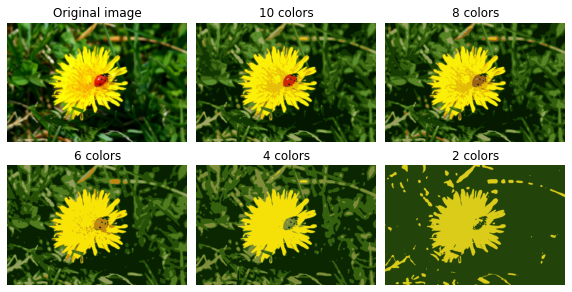

In [71]:
# 클러스터링에 따른 결과 시각화
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### 군집을 사용한 전처리

In [72]:
# 데이터 세팅
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [74]:
# 로지스틱 회귀 모델로 학습 및 평가
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [75]:
# K-평균으로 전처리 후 학습 및 평가
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.98

In [76]:
# 오차율 확인
1 - (1 - 0.977777) / (1 - 0.968888)

0.28570969400874346

In [77]:
# 후속 모델(로지스틱 회귀)의 성능을 높이는 k값을 서치
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 19.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [78]:
# 최적의 클러스터 갯수와 성능 확인
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 57}
0.98


### 군집을 사용한 준지도 학습

In [79]:
# 50개의 레이블만 가진 데이터로 학습 및 예측
n_labeled = 50
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

# '''
# 데이터에 50개만 레이블을 가지고 있다고 가정하고 측정한 예측 결과임.
# '''

0.8333333333333334

In [82]:
# 50개의 클러스터로 군집 및 대표이미지 설정
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

# '''
# sklearn의 K-평균은 센트로이드를 사용하기 때문에, 샘플을 기준으로 기준점을 잡지 않음.
# 그렇기 때문에 군집화를 한 다음 센트로이드에 가장 가까운 데이터 포인트 샘플을 대표이미지로 설정함.
# '''

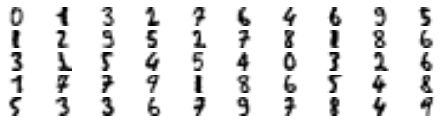

In [83]:
# 대표이미지 출력
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [84]:
# 대표이미지에 레이블 기입
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [85]:
# 대표이미지와 레이블로만 학습 및 예측
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

# '''
# 동일하게 50개의 샘플만으로 학습했는데, 성능이 훨씬 좋음.
# '''

0.9244444444444444

In [86]:
# 클러스터 내의 모든 샘플을 대표이미지와 같은 레이블을 갖도록 레이블 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [87]:
# 전파된 레이블을 활용해 학습 및 예측
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

# '''
# 레이블이 없다고 가정했던 샘플들에 레이블을 전파할 수 있음.
# 이를 통해 모든 데이터를 활용해 학습하고 예측할 수 있음.
# '''

0.9377777777777778

In [88]:
# 센트로이드에 가까운 20개의 샘플에만 레이블 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [89]:
# 레이블을 가진 데이터 포인트 샘플만 저장
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [90]:
# 센트로이드와 가까운 데이터 포인트만 사용해 학습하고 예측
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9222222222222223

In [91]:
# 센트로이드와 가까운 데이터 포인트의 레이블과 실제 레이블의 비교
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896193771626297

## DBSCAN

In [92]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# '''
# eps는 샘플을 찾는 범위를 결정하는 파라미터
# min_samples는 eps내의 몇개의 샘플이 포함되어야 하는지에 대한 파라미터
# eps내에 min_samples의 갯수를 넘으면 핵심 샘플로 판단하고, 이웃 샘플과의 거리를 확인함.
# '''

DBSCAN(eps=0.05)

In [93]:
# dbscan의 레이블 확인
dbscan.labels_[:10]

# '''
# 핵심 샘플도, 이웃 샘플도 아닌 경우 이상치로 분류하며, 레이블을 -1로 할당함.
# '''

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [94]:
# 핵심 샘플의 갯수 확인
len(dbscan.core_sample_indices_)

808

In [95]:
# 핵심 샘플의 인덱스 확인
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [97]:
# 핵심 샘플의 좌표(데이터 포인트) 확인
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [98]:
# 클러스터 갯수 확인
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [99]:
# eps를 2로 한 모델 생성
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [100]:
# 시각화 함수 정의
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

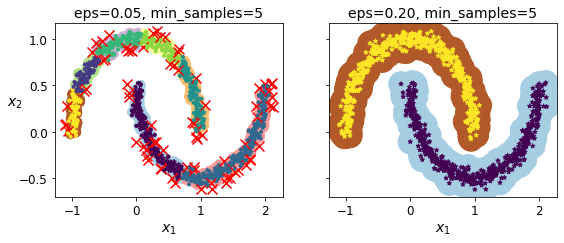

In [101]:
# 두 모델의 결과 시각화
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [104]:
# 클러스터의 핵심 샘플로 KNN 학습 및 새로운 데이터 예측
from sklearn.neighbors import KNeighborsClassifier

dbscan = dbscan2
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
knn.predict(X_new)

array([1, 0, 1, 0])

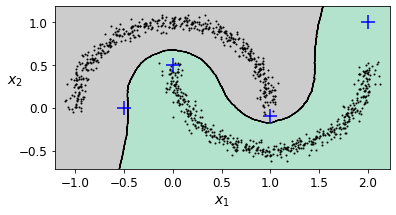

In [103]:
# KNN 결정경계 시각화
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [105]:
# DBSCAN의 코어 샘플과의 거리를 활용해 이상치까지 분류
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## 다른 군집 알고리즘

### 스펙트럼 군집

In [107]:
# gamma가 다른 모델 학습
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, affinity='rbf', gamma=100, random_state=42)
sc2 = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=42)
sc1.fit(X)
sc2.fit(X)

# '''
# affinity 파라미터는 기본값이 rbf커널임. (시그모이드와 같은 커널도 사용 가능)
# SVM과 유사한 기능을 함.
# '''

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [109]:
# 95% 가까운 데이터와의 유사도 확인
print(np.percentile(sc1.affinity_matrix_, 95))
print(np.percentile(sc2.affinity_matrix_, 95))

# '''
# gamma의 값이 클수록 샘플간의 영향이 줄어들기 때문에 유사도가 낮아짐.
# '''

0.04251990648936265
0.9689155435458034


In [110]:
# 시각화 함수 정의
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

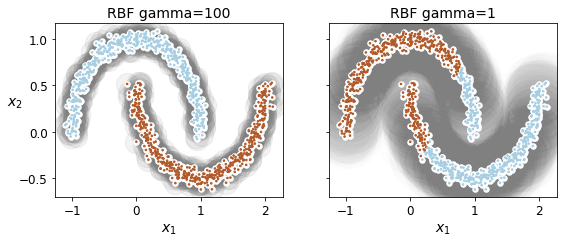

In [112]:
# 두 모델의 결과 시각화
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### 병합군집

In [113]:
# 새로운 샘플을 활용해 병합군집 모델 학습
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [114]:
# '_'로 끝나는 모델 객체의 속성 확인
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [115]:
# 리프노드가 아닌 자식노드를 확인
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])